<a href="https://colab.research.google.com/github/Igorvl/Projects/blob/master/%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%7C_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка

In [2]:
# Работа с массивами данных
import numpy as np 

import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline

In [3]:
# Загрузим датасет из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)

'writers.zip'

In [4]:
# Распакуем архив в папку writers
!unzip -o writers.zip -d writers/


Archive:  writers.zip
  inflating: writers/(Клиффорд_Саймак) Обучающая_5 вместе.txt  
  inflating: writers/(Клиффорд_Саймак) Тестовая_2 вместе.txt  
  inflating: writers/(Макс Фрай) Обучающая_5 вместе.txt  
  inflating: writers/(Макс Фрай) Тестовая_2 вместе.txt  
  inflating: writers/(О. Генри) Обучающая_50 вместе.txt  
  inflating: writers/(О. Генри) Тестовая_20 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Обучающая_22 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Тестовая_8 вместе.txt  
  inflating: writers/(Стругацкие) Обучающая_5 вместе.txt  
  inflating: writers/(Стругацкие) Тестовая_2 вместе.txt  
  inflating: writers/(Булгаков) Обучающая_5 вместе.txt  
  inflating: writers/(Булгаков) Тестовая_2 вместе.txt  


In [5]:
# Настройка констант для загрузки данных
FILE_DIR  = 'writers'                     # Папка с текстовыми файлами
SIG_TRAIN = 'обучающая'                   # Признак обучающей выборки в имени файла
SIG_TEST  = 'тестовая'                    # Признак тестовой выборки в имени файла

In [6]:
CLASS_LIST = []  # Список классов 
text_train = []  # Список для оучающей выборки
text_test = []   # Список для тестовой выборки

# Получение списка файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    # Имя класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)
    if m:

        # Имя класса
        class_name = m[1]

        # Имя выборки
        subset_name = m[2].lower()

        # Тип выборки 
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая либо тестовая - файл обрабатываем
        if is_train or is_test:

            # Добавляем новый класс, если его еще нет в списке
            if class_name not in CLASS_LIST:
                print(f'Добавление класса "{class_name}"')
                CLASS_LIST.append(class_name)

                # Инициализируем соответствующих классу строки текста
                text_train.append('')
                text_test.append('')

            # Найдем индекс класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')

            # Откроем файл на чтение  
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:  

                # Загрузим содержимого файла в строку
                text = f.read()
            # Определим выборку, куда будет добавлено содержимое
            subset = text_train if is_train else text_test

            # Добавим текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

Добавление класса "Булгаков"
Добавление файла "(Булгаков) Обучающая_5 вместе.txt" в класс "Булгаков", обучающая выборка.
Добавление класса "Клиффорд_Саймак"
Добавление файла "(Клиффорд_Саймак) Тестовая_2 вместе.txt" в класс "Клиффорд_Саймак", тестовая выборка.
Добавление класса "Рэй Брэдберри"
Добавление файла "(Рэй Брэдберри) Тестовая_8 вместе.txt" в класс "Рэй Брэдберри", тестовая выборка.
Добавление класса "Стругацкие"
Добавление файла "(Стругацкие) Тестовая_2 вместе.txt" в класс "Стругацкие", тестовая выборка.
Добавление файла "(Булгаков) Тестовая_2 вместе.txt" в класс "Булгаков", тестовая выборка.
Добавление класса "Макс Фрай"
Добавление файла "(Макс Фрай) Тестовая_2 вместе.txt" в класс "Макс Фрай", тестовая выборка.
Добавление класса "О. Генри"
Добавление файла "(О. Генри) Обучающая_50 вместе.txt" в класс "О. Генри", обучающая выборка.
Добавление файла "(Клиффорд_Саймак) Обучающая_5 вместе.txt" в класс "Клиффорд_Саймак", обучающая выборка.
Добавление файла "(О. Генри) Тестовая_20

In [7]:
re.match('\((.+)\) (\S+)_', file_name)
file_name

'(Стругацкие) Обучающая_5 вместе.txt'

In [8]:
# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

In [9]:
# Выведем прочитанные классы текстов
print(CLASS_LIST)

['Булгаков', 'Клиффорд_Саймак', 'Рэй Брэдберри', 'Стругацкие', 'Макс Фрай', 'О. Генри']


In [10]:
# Посчитаем количество текстов в обучающей выборке
print(len(text_train))

6


In [11]:
# Проверим загрузки: выведем начальные отрывки из каждого класса

for cls in range(CLASS_COUNT):                   # Запустим цикл по числу классов
    print(f'Класс: {CLASS_LIST[cls]}')           # Выведем имя класса
    print(f'  train: {text_train[cls][:200]}')   # Выведем фрагмент обучающей выборки
    print(f'  test : {text_test[cls][:200]}')    # Выведем фрагмент тестовой выборки
    print()

Класс: Булгаков
  train:  ﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]  Пошел мелкий снег и вдруг повалил хло-  пьями. Ветер завыл; сделалась метель.  В одно мгновение темное небо смешалось с  снежным мор
  test :  ﻿Дон Кихот ДЕЙСТВУЮЩИЕ ЛИЦА Алонсо Кихано, он же Дон Кихот Ламанчский.  Антония – его племянница.  Ключница Дон Кихота.  Санчо Панса – оруженосец Дон Кихота.  Перо Перес – деревенский священник, лице

Класс: Клиффорд_Саймак
  train:  ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. Этакая тяжелая громадина с прицепом, и неслась она во весь дух. Шоссе здесь срезает угол городка, и
  test :  ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за ученым. Гоблин ненавидел монаха и имел для этого все основания. Монах никого не ненавидел и не люб

Класс: Рэй Брэдберри
  train:  ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛАГОДАРНОСТЬЮ   Если тебе дадут линованную бумагу

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with

class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

## Решение

1. Из "Рекуррентные и одномерные сверточные нейронные сети" выберите лучшую сеть, либо создайте свою. 
2. Подготовьте датасет с параметрами `VOCAB_SIZE=20'000`, `WIN_SIZE=1000`, `WIN_HOP=100`, и обучите выбранную сеть. Параметры обучения можно взять из практики. Для  всех обучаемых сетей в данной работе они должны быть одни и теже.
3. Поменяйте размер словаря tokenaizera (`VOCAB_SIZE`) на `5000`, `10000`, `40000`.  Пересоздайте датасеты, при этом оставьте `WIN_SIZE=1000`, `WIN_HOP=100`.
Обучите выбранную нейронку на этих датасетах.  Сделайте выводы об  изменении  точности распознавания авторов текстов. Результаты сведите в таблицу

In [ ]:
# ваше решение

In [12]:
# Разбиение последовательности на отрезки скользящим окном
def split_sequence(sequence, win_size, hop):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Формирование выборок из последовательностей индексов
def vectorize_sequence(seq_list, win_size, hop):
    class_count = len(seq_list)
    x, y = [], []

    for cls in range(class_count):
        vectors = split_sequence(seq_list[cls], win_size, hop)
        x += vectors
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    return np.array(x), np.array(y)

# Компиляция и обучение модели нейронной сети
def compile_train_model(model,x_train,y_train,x_val,y_val,optimizer='adam',
                        epochs=50,batch_size=128,figsize=(20, 5)):

    model.compile(optimizer=optimizer,loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    print('\n')
    model.summary()
    print('\n')
    display(plot_model(model, dpi=60, show_shapes=True))

    history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,
                        validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

    return history


# Вывод результатов оценки модели
def eval_model(model, x, y_true,class_labels=[],cm_round=3,title='',figsize=(10, 10)):
    y_pred = model.predict(x)
    cm = confusion_matrix(np.argmax(y_true, axis=1),np.argmax(y_pred, axis=1),
                          normalize='true')
    cm = np.around(cm, cm_round)

    print('\n', f'Нейросеть: {title}')

    for cls in range(len(class_labels)):
        cls_pred = np.argmax(cm[cls])
        msg = 'ВЕРНО' if cls_pred == cls else 'НЕВЕРНО'
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
               100. * cm[cls, cls_pred],class_labels[cls_pred],msg))

    # Средняя точность распознавания
    mAccuracy = 100. * cm.diagonal().mean()
    print('\n','Средняя точность распознавания: {:3.0f}%'.format(mAccuracy), '\n')

    return mAccuracy

# Обучение и оценка модели
def compile_train_eval_model(model,x_train,y_train,x_test,y_test,class_labels=CLASS_LIST,
                             title='',optimizer='adam',epochs=50,batch_size=128,
                             graph_size=(20, 5),cm_size=(10, 10)):

    # Компиляция и обучение модели
    history = compile_train_model(model,x_train, y_train,x_test, y_test,optimizer=optimizer,
                        epochs=epochs,batch_size=batch_size,figsize=graph_size)

    # Вывод результатов оценки работы модели
    mAccuracy = eval_model(model, x_test, y_test,class_labels=class_labels, 
               title=title,figsize=cm_size)
    
    return pd.Series(mAccuracy, index=[title])

In [13]:
# Токенизация, построение частотного словаря, формирование обучающей выборки

def tokenz(VOCAB_SIZE = 20000, WIN_SIZE = 1000, WIN_HOP = 100):

    # Токенизация и построение частотного словаря по обучающим текстам
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

    # Преобразование обучающих и проверочных текстов текст в последовательности индексов согласно частотному словарю
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP) 
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

    return x_train, y_train, x_test, y_test

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 64)          320000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 1000, 64)         0         
 lDropout1D)                                                     
                                                                 
 batch_normalization_28 (Bat  (None, 1000, 64)         256       
 chNormalization)                                                
                                                                 
 bidirectional_14 (Bidirecti  (None, 1000, 32)         10368     
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 1000, 32)         6272      
 ona

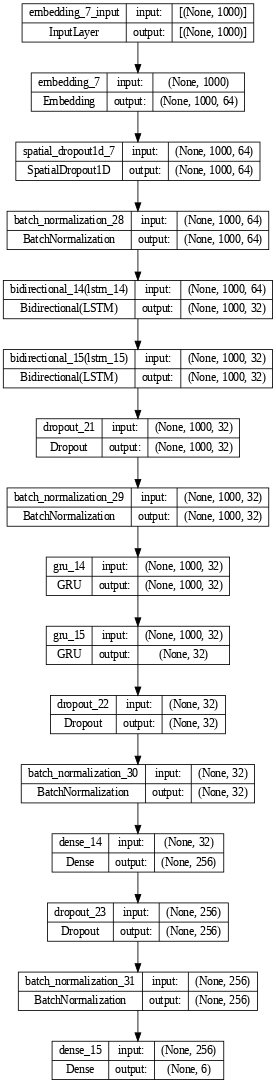

Epoch 1/25
69/69 [==============================] - 32s 301ms/step - loss: 1.6631 - accuracy: 0.3672 - val_loss: 1.7846 - val_accuracy: 0.2929
Epoch 2/25
69/69 [==============================] - 18s 264ms/step - loss: 0.9372 - accuracy: 0.6578 - val_loss: 2.2659 - val_accuracy: 0.2929
Epoch 3/25
69/69 [==============================] - 18s 261ms/step - loss: 0.6137 - accuracy: 0.7838 - val_loss: 2.2301 - val_accuracy: 0.2309
Epoch 4/25
69/69 [==============================] - 18s 261ms/step - loss: 0.3723 - accuracy: 0.8770 - val_loss: 2.5488 - val_accuracy: 0.1997
Epoch 5/25
69/69 [==============================] - 17s 251ms/step - loss: 0.2051 - accuracy: 0.9353 - val_loss: 3.2797 - val_accuracy: 0.2903
Epoch 6/25
69/69 [==============================] - 20s 284ms/step - loss: 0.1354 - accuracy: 0.9570 - val_loss: 2.4966 - val_accuracy: 0.4192
Epoch 7/25
69/69 [==============================] - 18s 260ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 2.0087 - val_accuracy: 0.5145

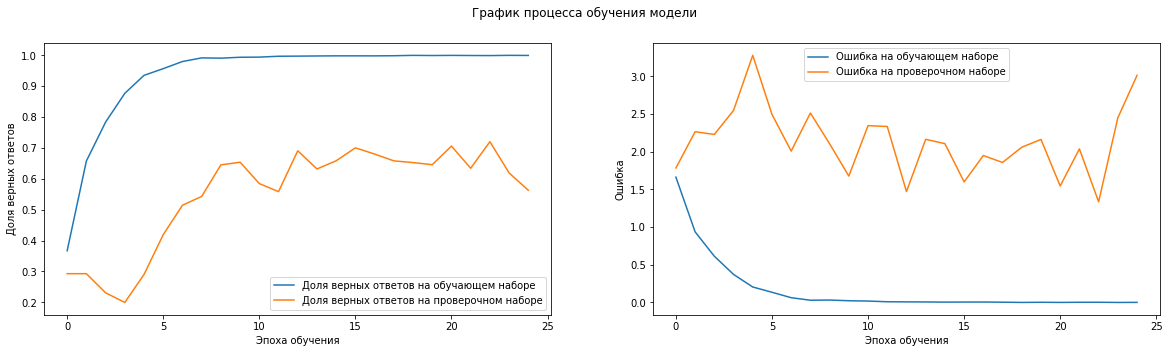

209/209 [==============================] - 21s 92ms/step

 Нейросеть: SIZE(5000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              39% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Стругацкие            64% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: О. Генри              47% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       50% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         67% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             98% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  50% 

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 64)          640000    
                                               

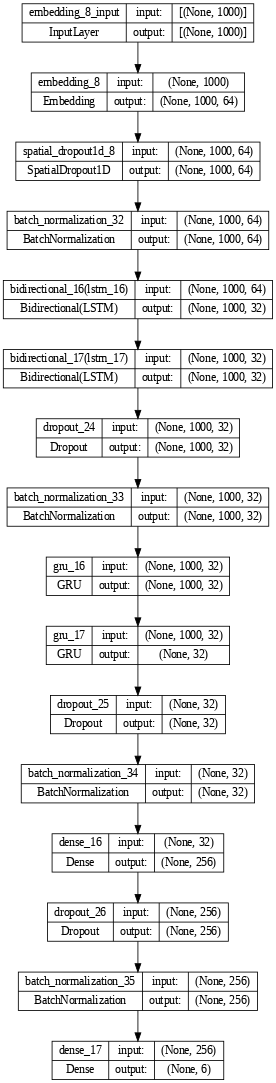

Epoch 1/25
69/69 [==============================] - 34s 310ms/step - loss: 1.6846 - accuracy: 0.3546 - val_loss: 1.7482 - val_accuracy: 0.2929
Epoch 2/25
69/69 [==============================] - 19s 277ms/step - loss: 0.9512 - accuracy: 0.6363 - val_loss: 1.8185 - val_accuracy: 0.3065
Epoch 3/25
69/69 [==============================] - 19s 283ms/step - loss: 0.5690 - accuracy: 0.7954 - val_loss: 2.2148 - val_accuracy: 0.2940
Epoch 4/25
69/69 [==============================] - 19s 271ms/step - loss: 0.2744 - accuracy: 0.9141 - val_loss: 2.8462 - val_accuracy: 0.3190
Epoch 5/25
69/69 [==============================] - 19s 283ms/step - loss: 0.0921 - accuracy: 0.9742 - val_loss: 1.7447 - val_accuracy: 0.4946
Epoch 6/25
69/69 [==============================] - 19s 270ms/step - loss: 0.0355 - accuracy: 0.9905 - val_loss: 3.0528 - val_accuracy: 0.3711
Epoch 7/25
69/69 [==============================] - 19s 281ms/step - loss: 0.0132 - accuracy: 0.9971 - val_loss: 3.5492 - val_accuracy: 0.4179

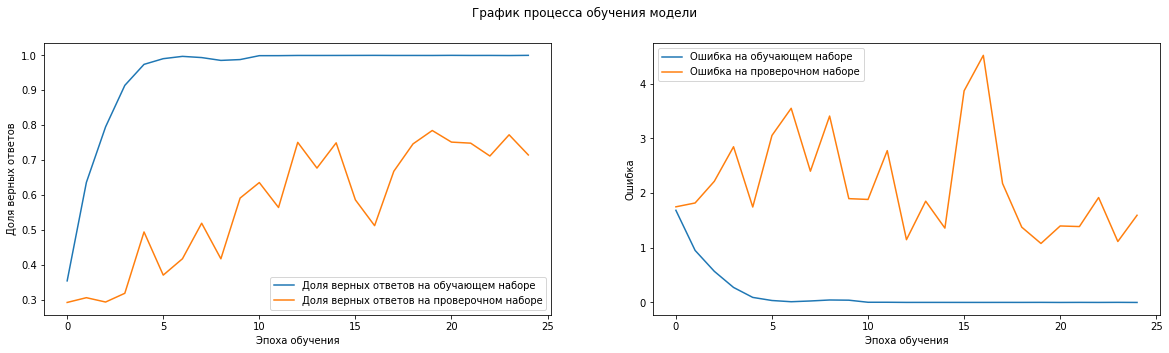

209/209 [==============================] - 22s 92ms/step

 Нейросеть: SIZE(10000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              65% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Стругацкие            45% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: О. Генри              99% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       61% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         65% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             90% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  71% 

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1000, 64)          2560000   
                                                  

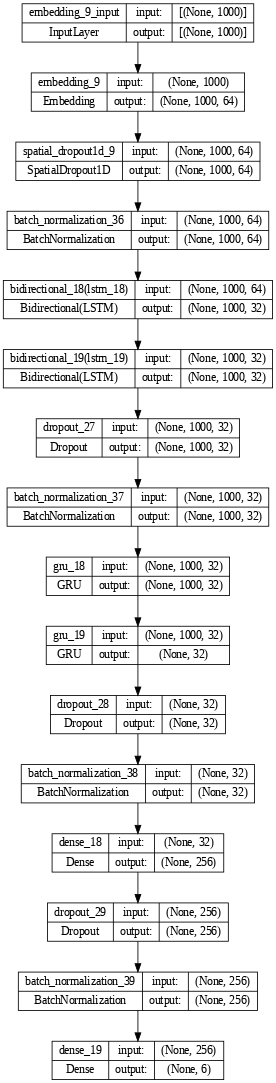

Epoch 1/25
69/69 [==============================] - 34s 324ms/step - loss: 1.6739 - accuracy: 0.3625 - val_loss: 1.7738 - val_accuracy: 0.2929
Epoch 2/25
69/69 [==============================] - 19s 274ms/step - loss: 0.8434 - accuracy: 0.6898 - val_loss: 1.9225 - val_accuracy: 0.1264
Epoch 3/25
69/69 [==============================] - 19s 282ms/step - loss: 0.3555 - accuracy: 0.8779 - val_loss: 2.6179 - val_accuracy: 0.1968
Epoch 4/25
69/69 [==============================] - 19s 271ms/step - loss: 0.1537 - accuracy: 0.9541 - val_loss: 2.4912 - val_accuracy: 0.3687
Epoch 5/25
69/69 [==============================] - 19s 283ms/step - loss: 0.0585 - accuracy: 0.9838 - val_loss: 2.6118 - val_accuracy: 0.4910
Epoch 6/25
69/69 [==============================] - 20s 286ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 3.2388 - val_accuracy: 0.4834
Epoch 7/25
69/69 [==============================] - 19s 282ms/step - loss: 0.0428 - accuracy: 0.9893 - val_loss: 3.0175 - val_accuracy: 0.4623

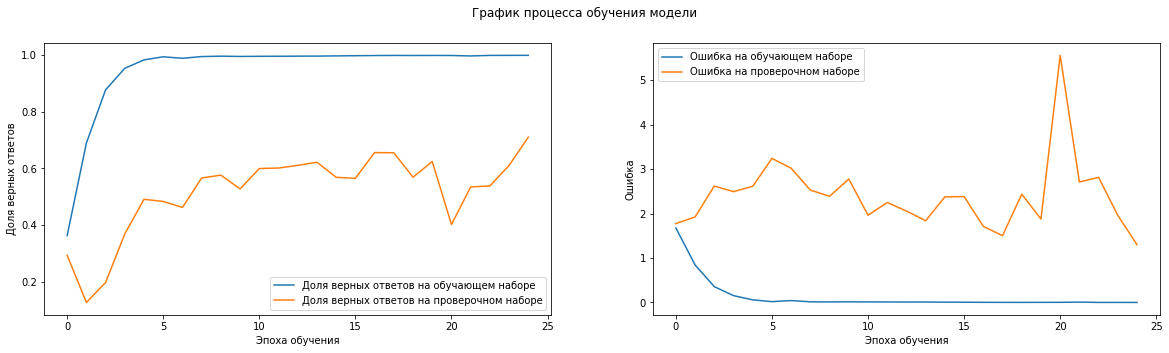

209/209 [==============================] - 22s 92ms/step

 Нейросеть: SIZE(40000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              61% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Стругацкие            56% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: О. Генри              72% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       98% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         83% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             70% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  74% 



,SIZE(5000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),SIZE(10000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),SIZE(40000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
0,50.466667,70.833333,73.533333


In [ ]:
VOCAB_SIZE = [5000, 10000, 40000]
tableRez = pd.DataFrame()
WIN_SIZE = 1000
WIN_HOP = 100
EmbLv = 64 # Embedding слой
BlstmLv = 16 # Двунаправленные рекуррентные слои LSTM
GruLv = 32 # Рекуррентные слои GRU
DnsLv = 256 # Полносвязный слой

for vSize in VOCAB_SIZE:
    x_train, y_train, x_test, y_test = tokenz(vSize, 1000, 100)

    mod = Sequential()
    mod.add(Embedding(vSize, EmbLv, input_length=WIN_SIZE))
    mod.add(SpatialDropout1D(0.1))
    mod.add(BatchNormalization())
    # Двунаправленные рекуррентные слои LSTM
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Рекуррентные слои GRU
    mod.add(GRU(GruLv, return_sequences=True, reset_after=True))
    mod.add(GRU(GruLv, reset_after=True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Полносвязный слой
    mod.add(Dense(DnsLv, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add(Dense(CLASS_COUNT, activation='softmax'))

    hist = compile_train_eval_model(mod, x_train, y_train, x_test, y_test, optimizer='rmsprop',
                            epochs=25, batch_size=256, class_labels=CLASS_LIST,
                            title=f'SIZE({vSize}) Embedding({EmbLv}) + BLSTM({BlstmLv})x2 + GRU({GruLv})x2 + Dense({DnsLv})')

    tableRez[hist.index[0]] = [hist[0]]
tableRez


4. Поменяйте длину отрезка текста и шаг окна разбиения текста на векторы (WIN_SIZE, WIN_HOP) используя значения (500,50) и (2000,200). Пересоздайте датасеты, при этом оставьте VOCAB_SIZE=20000. Обучите выбранную нейронку на этих датасетах. Сделайте выводы об изменении точности распознавания авторов текстов.
Результаты всей работы сведите в таблицу.

(887, 500) (887, 6)
(340, 500) (340, 6)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 64)          0         
 ropout1D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 500, 64)          256       
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 32)          10368     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 32)          6272      
 nal)         

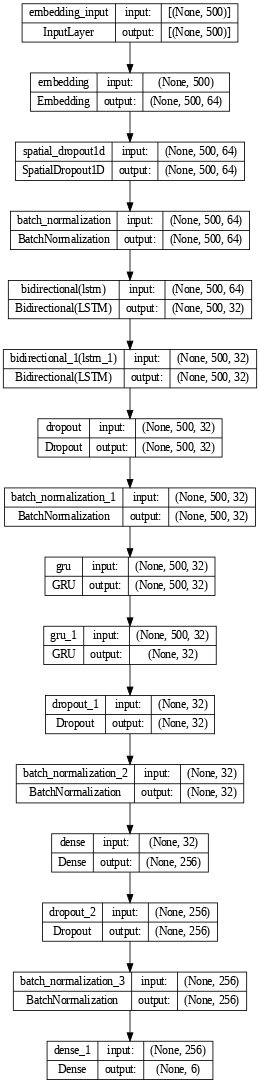

Epoch 1/25
4/4 [==============================] - 20s 993ms/step - loss: 2.1986 - accuracy: 0.1849 - val_loss: 1.7730 - val_accuracy: 0.2912
Epoch 2/25
4/4 [==============================] - 1s 235ms/step - loss: 1.5554 - accuracy: 0.3935 - val_loss: 1.7620 - val_accuracy: 0.2912
Epoch 3/25
4/4 [==============================] - 1s 221ms/step - loss: 1.1956 - accuracy: 0.5547 - val_loss: 1.7552 - val_accuracy: 0.2912
Epoch 4/25
4/4 [==============================] - 1s 220ms/step - loss: 0.9627 - accuracy: 0.6528 - val_loss: 1.7484 - val_accuracy: 0.2912
Epoch 5/25
4/4 [==============================] - 1s 192ms/step - loss: 0.7381 - accuracy: 0.7463 - val_loss: 1.7439 - val_accuracy: 0.2912
Epoch 6/25
4/4 [==============================] - 1s 232ms/step - loss: 0.5541 - accuracy: 0.8286 - val_loss: 1.7399 - val_accuracy: 0.2912
Epoch 7/25
4/4 [==============================] - 1s 226ms/step - loss: 0.4166 - accuracy: 0.8703 - val_loss: 1.7358 - val_accuracy: 0.2912
Epoch 8/25
4/4 [===

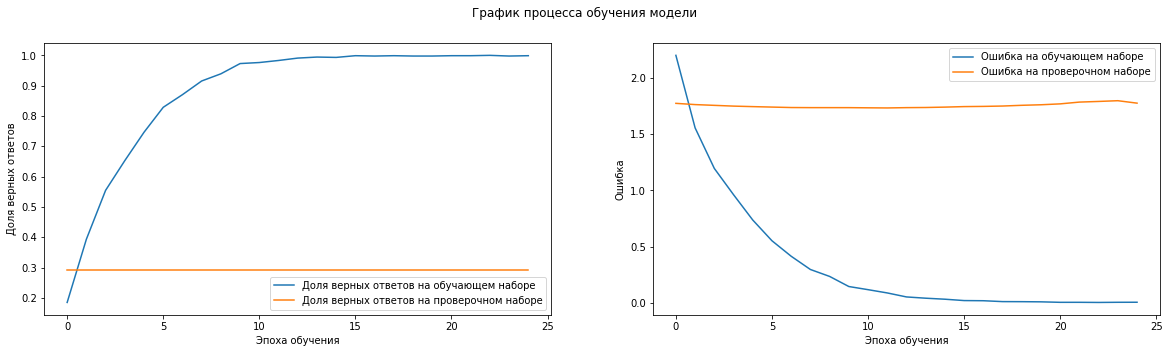

11/11 [==============================] - 2s 42ms/step

 Нейросеть: WSIZE(500) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков             100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Клиффорд_Саймак      100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Рэй Брэдберри        100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Стругацкие           100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Макс Фрай            100% сеть отнесла к классу Макс Фрай            - ВЕРНО
Класс: О. Генри             100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО

 Средняя точность распознавания:  17% 

(8836, 500) (8836, 6)
(3360, 500) (3360, 6)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           1280000   
                                    

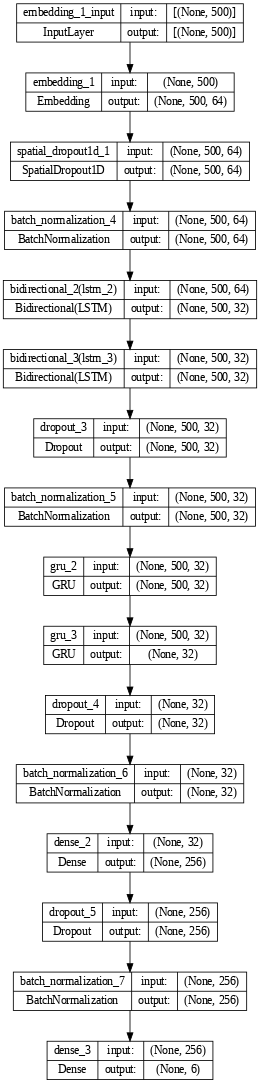

Epoch 1/25
35/35 [==============================] - 21s 288ms/step - loss: 1.8532 - accuracy: 0.2910 - val_loss: 1.7483 - val_accuracy: 0.2923
Epoch 2/25
35/35 [==============================] - 7s 210ms/step - loss: 1.2991 - accuracy: 0.5188 - val_loss: 1.7971 - val_accuracy: 0.2923
Epoch 3/25
35/35 [==============================] - 7s 196ms/step - loss: 0.8458 - accuracy: 0.6891 - val_loss: 1.7975 - val_accuracy: 0.2958
Epoch 4/25
35/35 [==============================] - 7s 203ms/step - loss: 0.5168 - accuracy: 0.8193 - val_loss: 1.8339 - val_accuracy: 0.2881
Epoch 5/25
35/35 [==============================] - 6s 183ms/step - loss: 0.2849 - accuracy: 0.9013 - val_loss: 1.7950 - val_accuracy: 0.3560
Epoch 6/25
35/35 [==============================] - 7s 190ms/step - loss: 0.1499 - accuracy: 0.9512 - val_loss: 2.4281 - val_accuracy: 0.1923
Epoch 7/25
35/35 [==============================] - 6s 178ms/step - loss: 0.0831 - accuracy: 0.9736 - val_loss: 3.0342 - val_accuracy: 0.1542
Epoch

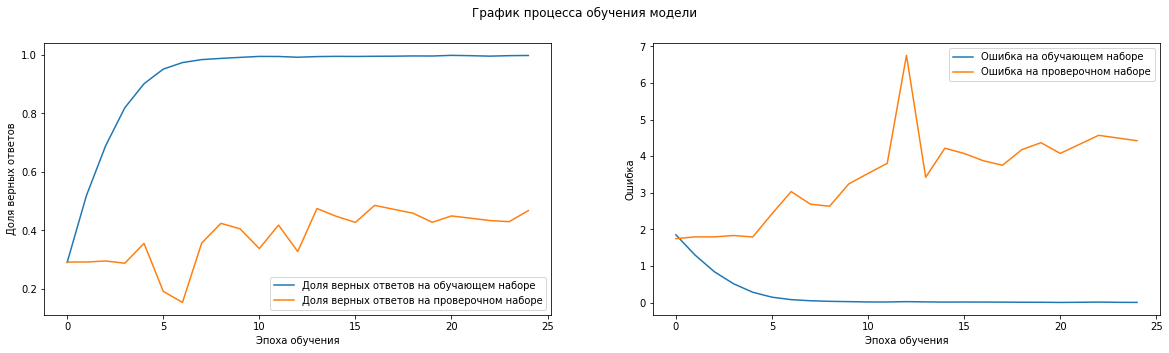

105/105 [==============================] - 6s 38ms/step

 Нейросеть: WSIZE(500) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              26% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Клиффорд_Саймак       44% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         26% сеть отнесла к классу Клиффорд_Саймак      - НЕВЕРНО
Класс: Стругацкие            38% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: Макс Фрай             82% сеть отнесла к классу Макс Фрай            - ВЕРНО
Класс: О. Генри              45% сеть отнесла к классу О. Генри             - ВЕРНО

 Средняя точность распознавания:  43% 

(888, 50) (888, 6)
(341, 50) (341, 6)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            1280000   
                                                 

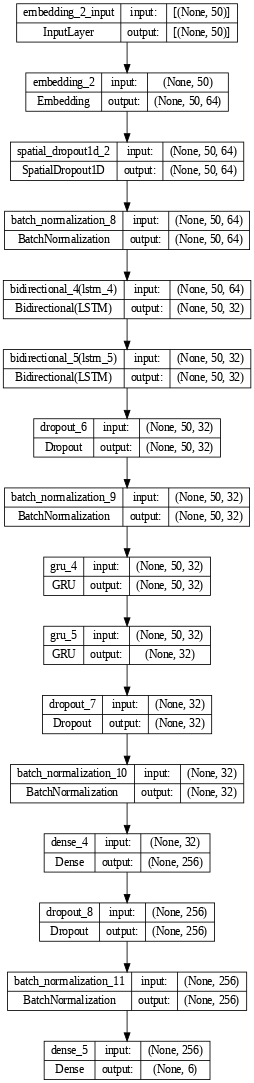

Epoch 1/25
4/4 [==============================] - 13s 742ms/step - loss: 2.2611 - accuracy: 0.2061 - val_loss: 1.7676 - val_accuracy: 0.2903
Epoch 2/25
4/4 [==============================] - 1s 160ms/step - loss: 1.5818 - accuracy: 0.3750 - val_loss: 1.7633 - val_accuracy: 0.2903
Epoch 3/25
4/4 [==============================] - 1s 151ms/step - loss: 1.2231 - accuracy: 0.5495 - val_loss: 1.7639 - val_accuracy: 0.2903
Epoch 4/25
4/4 [==============================] - 1s 154ms/step - loss: 0.9421 - accuracy: 0.6622 - val_loss: 1.7683 - val_accuracy: 0.2903
Epoch 5/25
4/4 [==============================] - 1s 160ms/step - loss: 0.7023 - accuracy: 0.7534 - val_loss: 1.7711 - val_accuracy: 0.2903
Epoch 6/25
4/4 [==============================] - 1s 240ms/step - loss: 0.5342 - accuracy: 0.8277 - val_loss: 1.7730 - val_accuracy: 0.3079
Epoch 7/25
4/4 [==============================] - 1s 248ms/step - loss: 0.3737 - accuracy: 0.8874 - val_loss: 1.7813 - val_accuracy: 0.1613
Epoch 8/25
4/4 [===

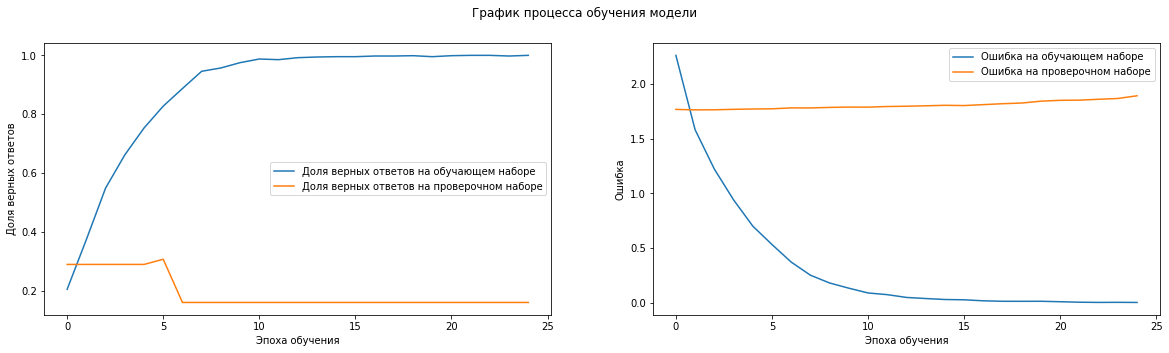

11/11 [==============================] - 2s 13ms/step

 Нейросеть: WSIZE(50) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков             100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Клиффорд_Саймак      100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Рэй Брэдберри        100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Стругацкие           100% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: Макс Фрай            100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: О. Генри             100% сеть отнесла к классу Стругацкие           - НЕВЕРНО

 Средняя точность распознавания:  17% 

(8850, 50) (8850, 6)
(3372, 50) (3372, 6)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 64)            1280000   
                                       

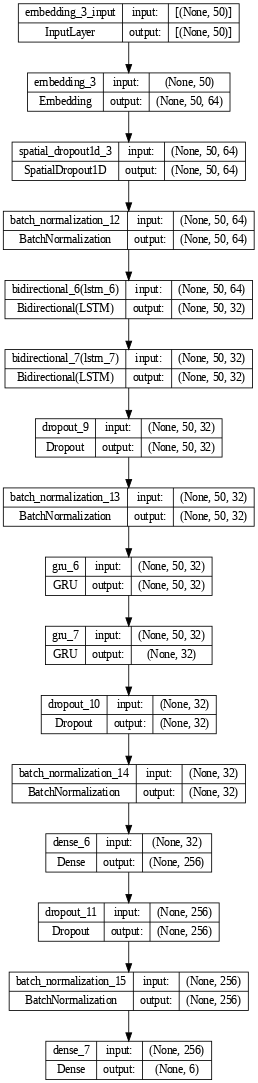

Epoch 1/25
35/35 [==============================] - 17s 194ms/step - loss: 1.8535 - accuracy: 0.2719 - val_loss: 1.7414 - val_accuracy: 0.2918
Epoch 2/25
35/35 [==============================] - 3s 95ms/step - loss: 1.3932 - accuracy: 0.4690 - val_loss: 1.7501 - val_accuracy: 0.2918
Epoch 3/25
35/35 [==============================] - 3s 93ms/step - loss: 0.9682 - accuracy: 0.6411 - val_loss: 1.7689 - val_accuracy: 0.2918
Epoch 4/25
35/35 [==============================] - 3s 97ms/step - loss: 0.5923 - accuracy: 0.7890 - val_loss: 1.7556 - val_accuracy: 0.2921
Epoch 5/25
35/35 [==============================] - 3s 99ms/step - loss: 0.3242 - accuracy: 0.8886 - val_loss: 1.6735 - val_accuracy: 0.2966
Epoch 6/25
35/35 [==============================] - 2s 62ms/step - loss: 0.1752 - accuracy: 0.9385 - val_loss: 2.0398 - val_accuracy: 0.2918
Epoch 7/25
35/35 [==============================] - 2s 64ms/step - loss: 0.0923 - accuracy: 0.9704 - val_loss: 1.7179 - val_accuracy: 0.3298
Epoch 8/25


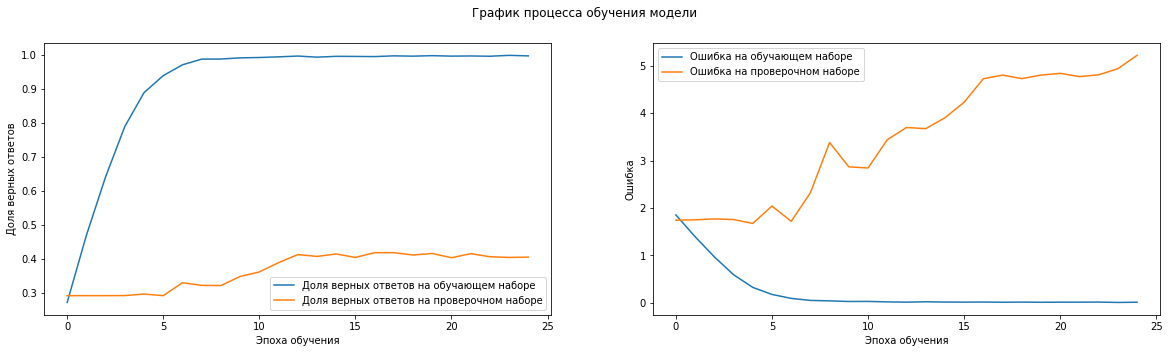

106/106 [==============================] - 3s 10ms/step

 Нейросеть: WSIZE(50) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              34% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Клиффорд_Саймак       32% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         29% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Стругацкие            33% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: Макс Фрай             60% сеть отнесла к классу Макс Фрай            - ВЕРНО
Класс: О. Генри              37% сеть отнесла к классу О. Генри             - ВЕРНО

 Средняя точность распознавания:  38% 



,WSIZE(500) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),WSIZE(500) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),WSIZE(50) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),WSIZE(50) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
0,16.666667,43.233333,16.666667,37.533333


In [14]:
VOCAB_SIZE = 20000
tableRez = pd.DataFrame()
WIN_SIZE = [500,50]
WIN_HOP = [2000,200]
EmbLv = 64 # Embedding слой
BlstmLv = 16 # Двунаправленные рекуррентные слои LSTM
GruLv = 32 # Рекуррентные слои GRU
DnsLv = 256 # Полносвязный слой

for wSize in WIN_SIZE:
  for wHope in WIN_HOP:
    x_train, y_train, x_test, y_test = tokenz(VOCAB_SIZE, wSize, wHope)

    mod = Sequential()
    mod.add(Embedding(VOCAB_SIZE, EmbLv, input_length=wSize))
    mod.add(SpatialDropout1D(0.1))
    mod.add(BatchNormalization())
    # Двунаправленные рекуррентные слои LSTM
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Рекуррентные слои GRU
    mod.add(GRU(GruLv, return_sequences=True, reset_after=True))
    mod.add(GRU(GruLv, reset_after=True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Полносвязный слой
    mod.add(Dense(DnsLv, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add(Dense(CLASS_COUNT, activation='softmax'))

    hist = compile_train_eval_model(mod, x_train, y_train, x_test, y_test, optimizer='rmsprop',
                            epochs=25, batch_size=256, class_labels=CLASS_LIST,
                            title=f'WSIZE({wSize}) WHOPE({wHope}) Embedding({EmbLv}) + BLSTM({BlstmLv})x2 + GRU({GruLv})x2 + Dense({DnsLv})')

    tableRez[hist.index[0]] = [hist[0]]
tableRez

Вывод: успешность обучения НС в большей степени зависит от величины выборки, нежели от WSIZE WHOPE